In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Data file.csv')

In [3]:
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
#checking for count of rows and columns in dataset
data.shape

(209593, 37)

In [5]:
#dropping unwanted column as it contains on index numbers for rows

data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
#Checking for duplicates in dataset

data.duplicated().sum()

1

- Looks like there is only 1 duplicate entry.

In [7]:
#removing duplicate entry

data.drop_duplicates(inplace=True)

In [8]:
data.shape

(209592, 36)

In [9]:
data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [10]:
data.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [11]:
#seperating and creating individual list for dataset.

cat_cols=[]
cont_cols=[]
for i in data:
    if data[i].dtype=='object':
        cat_cols.append(i)
    else:
        cont_cols.append(i)

In [12]:
print(cat_cols)
print('***'*60)
print(cont_cols)

['msisdn', 'pcircle', 'pdate']
************************************************************************************************************************************************************************************
['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']


In [13]:
data['pcircle'].value_counts()

UPW    209592
Name: pcircle, dtype: int64

In [14]:
data['msisdn'].value_counts()

04581I85330    7
47819I90840    7
43430I70786    6
55809I89238    6
67324I84453    6
              ..
28720I90840    1
36902I90840    1
17447I88689    1
59686I90584    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64

-'pcircle' consists of only one telecom circle for all rows and 'msisdn' consists of mobile numbers of users. This both data is not used in model. Hence dropping both columns.

In [15]:
# dropping pcircle and msisdn columns
data.drop(['msisdn','pcircle'],axis=1,inplace=True)

In [16]:
#dataset shape after dropping more 2 columns
data.shape

(209592, 34)

In [17]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [18]:
data['pdate'].value_counts()

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
2016-07-06    3041
2016-06-15    3033
2016-07-11    3020
2016-07-10    3014
2016-06-27    2999
2016-06-18    2972
2016-06-23    2964
2016-07-12    2962
2016-06-25    2956
2016-07-01    2954
2016-07-13    2953
2016-06-14    2945
2016-06-12    2936
2016-07-18    2926
2016-07-09    2922
2016-07-14    2920
2016-06-11    2915
2016-07-02    2910
2016-07-15    2908
2016-06-22    2906
2016-07-03    2905
2016-06-26    2901
2016-06-13    2897
2016-07-19    2892
2016-07-08    2891
2016-06-21    2890
2016-07-17    2873
2016-06-10    2858
2016-07-23    2851
2016-07-22    2847
2016-07-20    2842
2016-07-16    2839
2016-06-19    2833
2016-06-29    2832
2016-06-16    2824
2016-06-30    2822
2016-06-24    2785
2016-07-21    2750
2016-06-28    2664
2016-06-06    2631
2016-06-09    2604
2016-06-08    2580
2016-06-02    2577
2016-06-05    2564
2016-06-01    2535
2016-06-07    2502
2016-06-03    2489
2016-08-04  

- Since date consits data for only 2016 year, hence we can delete year from that and seperate month and days into seperate columns, This will be better for model building as well as analysing data.

In [19]:
data['year'] = pd.to_datetime(data['pdate']).dt.year
data['day']=pd.to_datetime(data['pdate']).dt.day
data['month']=pd.to_datetime(data['pdate']).dt.month

In [20]:
data.shape

(209592, 37)

In [21]:
# as said earlier dropping year as it contains same data and also date column as its not required now
data.drop(['year','pdate'],inplace=True,axis=1)

In [22]:
data.shape

(209592, 35)

In [23]:
data['month'].value_counts()

7    85764
6    83154
8    40674
Name: month, dtype: int64

In [24]:
data[:100]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month
0,0,272.000000,3055.050000,3065.150000,220.13,260.13,2.000000,0.0,1539,2,21.0,3078.0,1539.0,7.500,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.000000,12122.000000,12124.750000,3691.26,3691.26,20.000000,0.0,5787,1,0.0,5787.0,5787.0,61.040,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.000000,1398.000000,1398.000000,900.13,900.13,3.000000,0.0,1539,1,0.0,1539.0,1539.0,66.320,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.000000,21.228000,21.228000,159.42,159.42,41.000000,0.0,947,0,0.0,0.0,0.0,0.000,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.000000,150.619333,150.619333,1098.90,1098.90,4.000000,0.0,2309,7,2.0,20029.0,2309.0,29.000,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
5,1,568.000000,2257.362667,2261.460000,368.13,380.13,2.000000,0.0,1539,4,10.0,6156.0,1539.0,15.400,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,2,7
6,1,545.000000,2876.641667,2883.970000,335.75,402.90,13.000000,0.0,5787,1,0.0,5787.0,5787.0,277.800,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,5,7
7,1,768.000000,12905.000000,17804.150000,900.35,2549.11,4.000000,55.0,3178,3,3.0,10404.0,3178.0,36.000,9,3,26095,3178.0,36.00,0.0,0.0,1,0,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,5,8
8,1,1191.000000,90.695000,90.695000,2287.50,2287.50,1.000000,0.0,1539,4,1.0,6164.0,1539.0,39.900,4,1,6164,1539.0,39.90,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,15,6
9,1,536.000000,29.357333,29.357333,612.96,612.96,11.000000,0.0,773,1,0.0,773.0,773.0,86.800,1,0,773,773.0,86.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,6


In [25]:
#checking for number of zero values in dataset
data.isin([0]).sum()

label                    26162
aon                          0
daily_decr30              4144
daily_decr90              4063
rental30                  7566
rental90                  6918
last_rech_date_ma        20743
last_rech_date_da       202860
last_rech_amt_ma         20995
cnt_ma_rech30            27979
fr_ma_rech30             78683
sumamnt_ma_rech30        27979
medianamnt_ma_rech30     27979
medianmarechprebal30     30680
cnt_ma_rech90            20950
fr_ma_rech90             65753
sumamnt_ma_rech90        20950
medianamnt_ma_rech90     20950
medianmarechprebal90     23391
cnt_da_rech30           205478
fr_da_rech30            208013
cnt_da_rech90           204225
fr_da_rech90            208727
cnt_loans30               3259
amnt_loans30              3259
maxamnt_loans30           3244
medianamnt_loans30      195444
cnt_loans90               2036
amnt_loans90              2043
maxamnt_loans90           2043
medianamnt_loans90      197423
payback30               106712
payback9

In [26]:
#seeing same data in %wise.
(data.isin([0]).sum()/data.shape[0])*100 
#no. of zero row values divided by number of rows

label                   12.482347
aon                      0.000000
daily_decr30             1.977175
daily_decr90             1.938528
rental30                 3.609871
rental90                 3.300698
last_rech_date_ma        9.896847
last_rech_date_da       96.788045
last_rech_amt_ma        10.017081
cnt_ma_rech30           13.349269
fr_ma_rech30            37.541032
sumamnt_ma_rech30       13.349269
medianamnt_ma_rech30    13.349269
medianmarechprebal30    14.637963
cnt_ma_rech90            9.995611
fr_ma_rech90            31.371904
sumamnt_ma_rech90        9.995611
medianamnt_ma_rech90     9.995611
medianmarechprebal90    11.160254
cnt_da_rech30           98.037139
fr_da_rech30            99.246632
cnt_da_rech90           97.439311
fr_da_rech90            99.587293
cnt_loans30              1.554926
amnt_loans30             1.554926
maxamnt_loans30          1.547769
medianamnt_loans30      93.249742
cnt_loans90              0.971411
amnt_loans90             0.974751
maxamnt_loans9

These columns which are 'last_rech_date_da','cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'medianamnt_loans30', 'medianamnt_loans90' have data in zero values for >90%, this means for this columns model learning will be disturbed as 90% of data is covered with zero. Hence I'm dropping these columns.

In [27]:
#dropping columns

data.drop(['last_rech_date_da','cnt_da_rech30',
          'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90',
          'medianamnt_loans30', 'medianamnt_loans90'],axis=1,inplace=True)

In [28]:
#final shape of dataset after dropping necessary columns
data.shape

(209592, 28)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209592 entries, 0 to 209592
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209592 non-null  int64  
 1   aon                   209592 non-null  float64
 2   daily_decr30          209592 non-null  float64
 3   daily_decr90          209592 non-null  float64
 4   rental30              209592 non-null  float64
 5   rental90              209592 non-null  float64
 6   last_rech_date_ma     209592 non-null  float64
 7   last_rech_amt_ma      209592 non-null  int64  
 8   cnt_ma_rech30         209592 non-null  int64  
 9   fr_ma_rech30          209592 non-null  float64
 10  sumamnt_ma_rech30     209592 non-null  float64
 11  medianamnt_ma_rech30  209592 non-null  float64
 12  medianmarechprebal30  209592 non-null  float64
 13  cnt_ma_rech90         209592 non-null  int64  
 14  fr_ma_rech90          209592 non-null  int64  
 15  

In [30]:
data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'day',
       'month'],
      dtype='object')

In [31]:
data['maxamnt_loans30'].value_counts()

6.000000        179192
12.000000        26109
0.000000          3244
17083.998141         1
62511.750702         1
98181.756891         1
79966.197156         1
79252.945085         1
91706.128158         1
64996.872921         1
73736.031668         1
32160.169545         1
73337.217304         1
48719.942650         1
98811.535023         1
57017.512973         1
18728.012202         1
90964.396949         1
29776.652490         1
10726.319276         1
21636.159614         1
77874.444620         1
43694.747492         1
96204.663614         1
63640.838944         1
27835.336176         1
25054.009730         1
42661.299873         1
70942.823938         1
95486.027180         1
40570.380180         1
81119.717527         1
34945.882614         1
34736.400599         1
80145.572700         1
71557.754508         1
88718.161049         1
75447.922695         1
50236.949326         1
68153.767618         1
56843.299828         1
39747.827885         1
39708.109355         1
18170.23685

- It is known to us from problem statement that this column should have data as either 6,12 or 0, But this columns contains some random data other than mentioned.
Hence I'll be replacing that randon data and replace it with zero since replacing that data points with some other data might hamper models accuracy as I might include some false data in it.

In [32]:
# Locating the values which have data other than 6,12 and 0

data.loc[(data['maxamnt_loans30'] != 6.0) & (data['maxamnt_loans30'] != 12.0) & (data['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
499       28574.830964
520       71532.935430
645       83207.495583
887       34044.361979
1091      43221.389235
1142       6041.731394
1201      27793.098567
1930      55723.858041
2030       6721.146132
2520      45683.595975
3073      56383.080492
3378      81942.467056
3751      86416.878765
3754      45073.630216
3879      37341.425477
4299      75689.411348
5868      14453.317604
5901      31906.326993
6078      30423.104698
6095      98416.189192
6139      92891.354661
6146      11721.237167
6205      59472.558915
6334      73539.025803
6897      64645.934675
7186      18091.746969
7355      81260.829943
7889      23483.269628
8122      19232.601189
8123      40618.875959
8204      81381.021186
8255      67464.429120
8303      89559.216166
9043      20338.052234
9188      13261.479515
9679      55523.246463
9793      51790.857423
10126     11466.779886
10151     1

In [33]:
#finding how many rows have values other than 6,12 and 0

len(data.loc[(data['maxamnt_loans30'] != 6.0) & (data['maxamnt_loans30'] != 12.0) & (data['maxamnt_loans30']!=0.0), 'maxamnt_loans30'])

1047

- 1047 rows of maxamnt_loans30 column is filled with values other than 6,12 and 0.
- This values need to be changed to 0.

In [34]:
# Changing the values having other than 6,12 & 0 into 0 values
data.loc[(data['maxamnt_loans30'] != 6.0) & (data['maxamnt_loans30'] != 12.0) & (data['maxamnt_loans30']!=0.0), 'maxamnt_loans30'] = 0.0

In [35]:
#checking for value counts after replacing data with 0.

data['maxamnt_loans30'].value_counts()

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

#  Dataset analysis using visualization

In [36]:
#printing dataset columns

data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'day',
       'month'],
      dtype='object')

<AxesSubplot:xlabel='label', ylabel='count'>

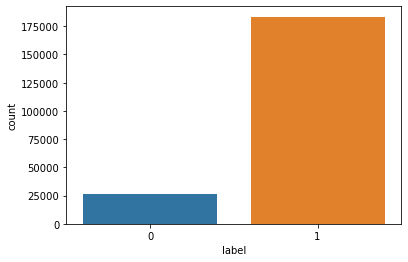

In [37]:
#plotting countplot for target variable
sns.countplot(data['label'])

- The above plot shows most of the people who took loan repayed on time while very less number of people are loan defaulters.

# Target/Label for this particular dataset is 'label' column

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='count'>

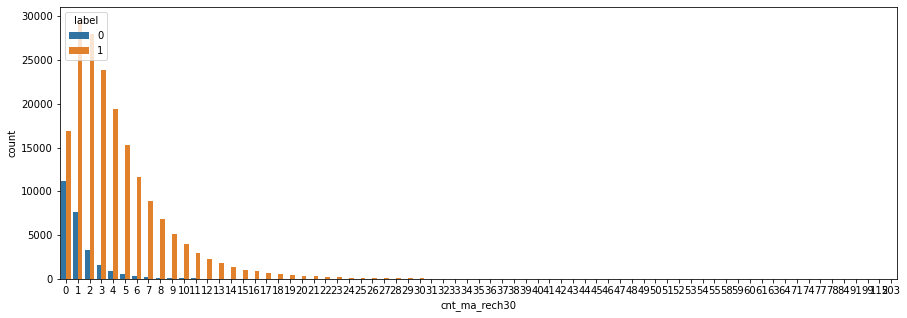

In [115]:
plt.figure(figsize=(15,5))
sns.countplot(data['cnt_ma_rech30'],hue=data['label'])

- It can be seen from the plot that highest number of non- defaulters had their main account recharged in last 30 days. 
- Most single number of people had their main account recharged in last 30 days, while as the number of persons the count of persons decreses

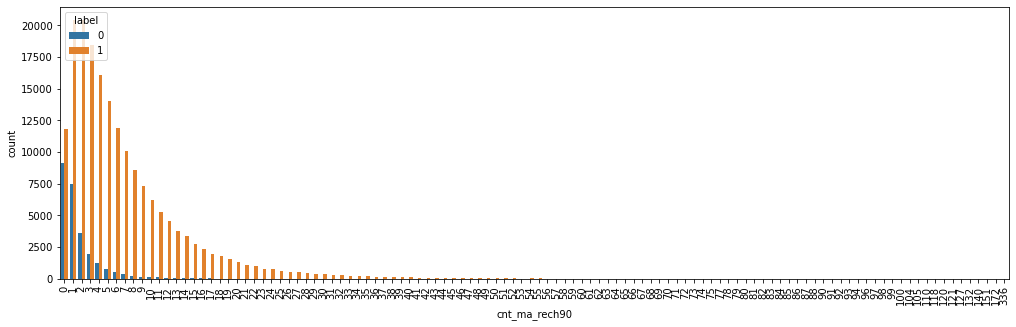

In [116]:
plt.figure(figsize=(17,5))
sns.countplot(data['cnt_ma_rech90'],hue=data['label'])
plt.xticks(rotation=90)
plt.show()

- It can be seen from the plot that highest number of non- defaulters had their main account recharged in last 90 days.
- Mostly 1-3 number of people had their main account recharged in last 90 days, while as the number of persons the count of persons decreses

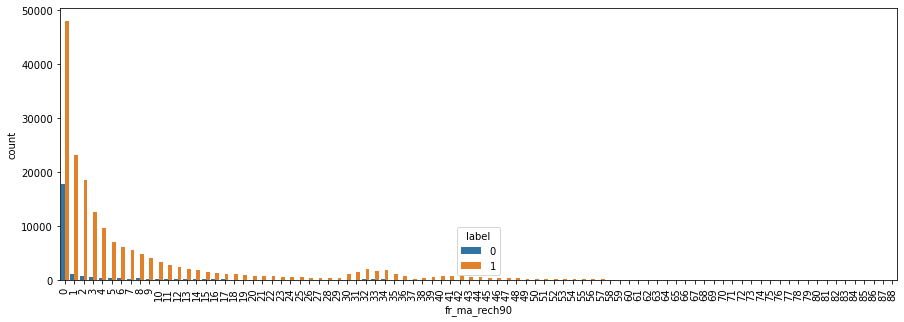

In [118]:
plt.figure(figsize=(15,5))
sns.countplot(data['fr_ma_rech90'],hue=data['label'])
plt.xticks(rotation=90)
plt.show()

- The above plot shows the frequency of main account recharged in last 90 days.
- It can be seen that most non-defaulters account recharged single time which is more than defaulters. This trend is seen throughout.

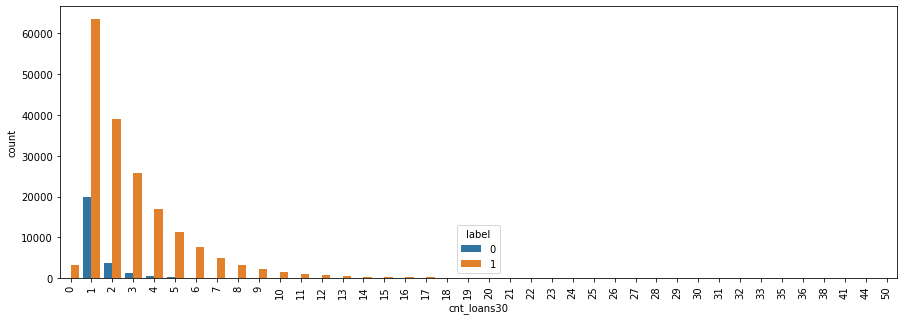

In [117]:
plt.figure(figsize=(15,5))
sns.countplot(data['cnt_loans30'],hue=data['label'])
plt.xticks(rotation=90)
plt.show()

- It can be seen from the plot that most non-defaulters took only 1 loan in last 30 days than defaulters.
 

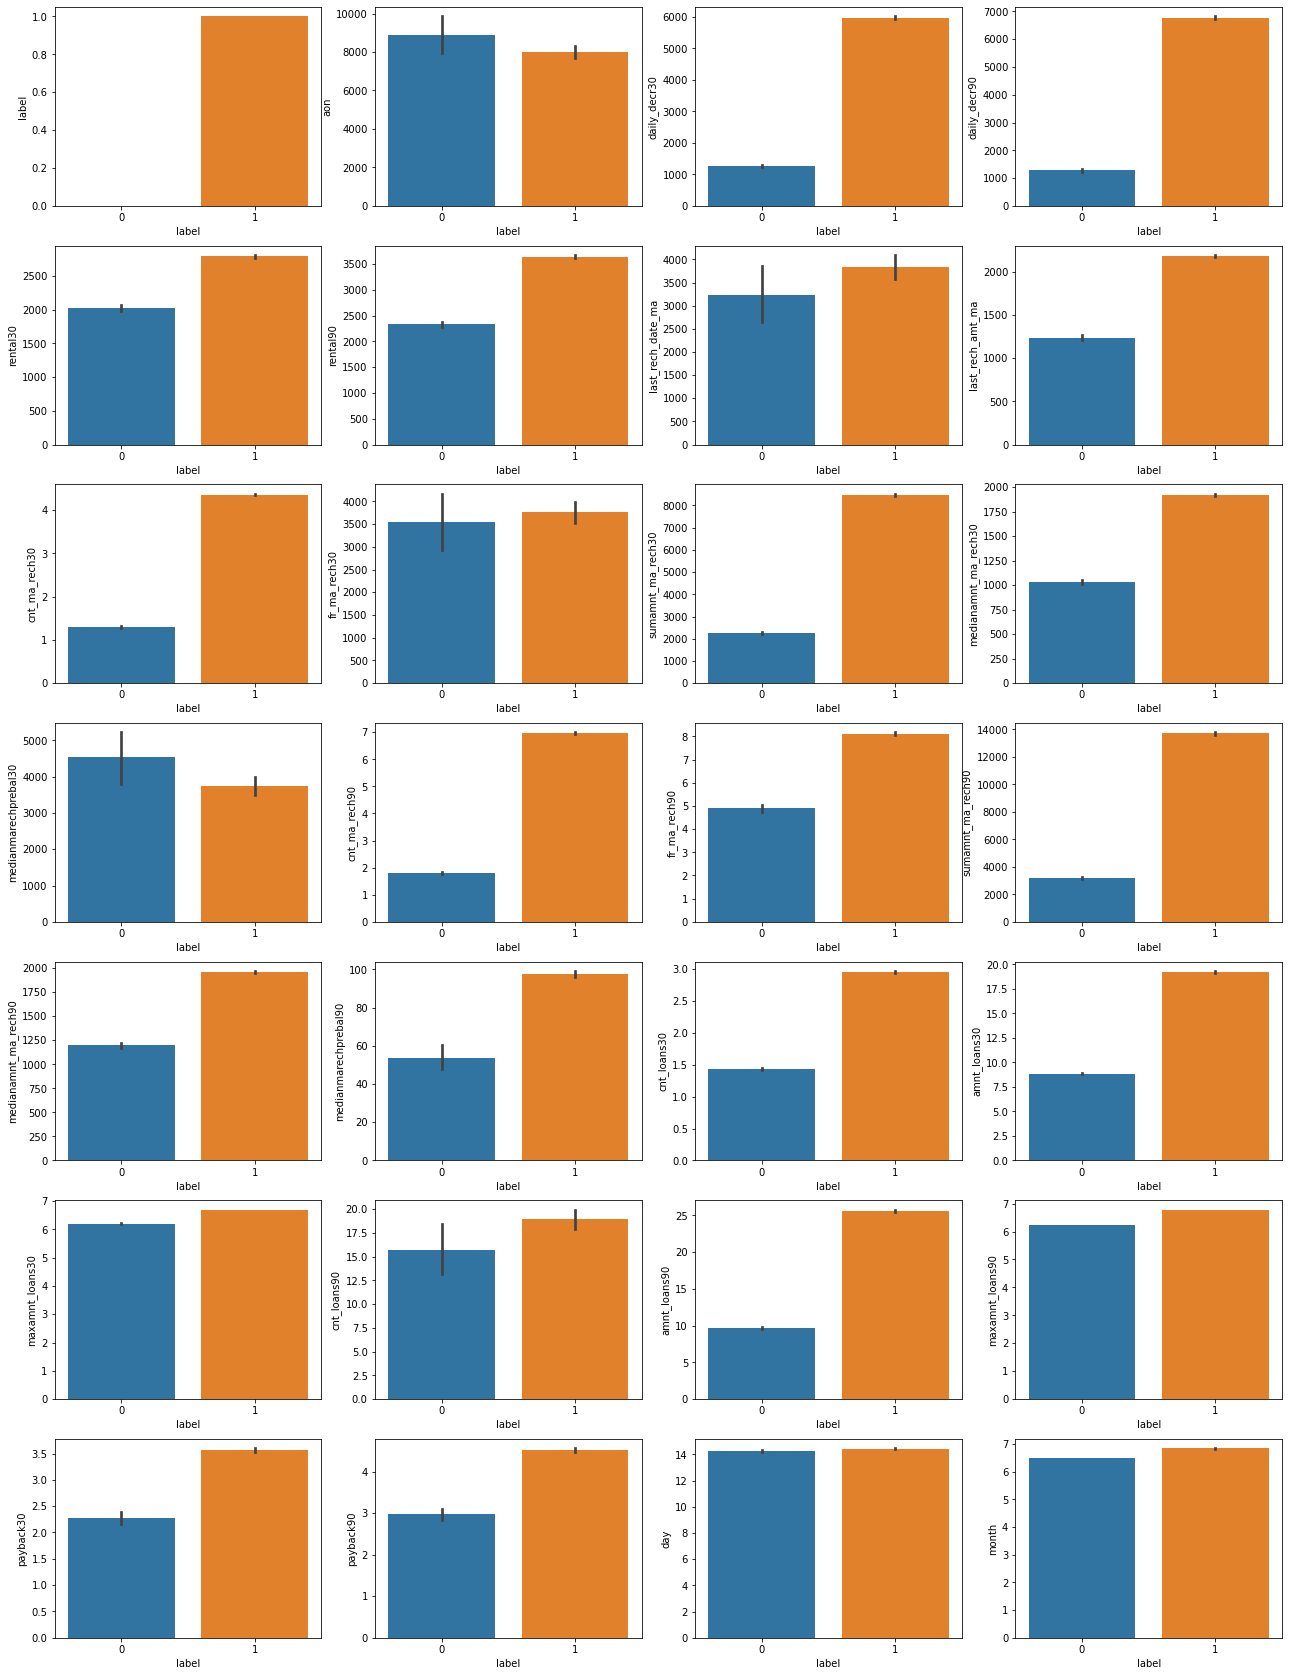

In [48]:
# checking relationship of label wrt features

plt.figure(figsize=(22,30))
plotnumber=1
for column in data:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.barplot(x=data['label'],y=data[column])
        plt.ylabel(column)
    plotnumber+=1
plt.show()

Observation for above plots.
-


- **Plot of label vs aon** suggests that the loan defaulters age on cellular network in days is high compared to non defaulters age

- **Plot of label vs daily_decr30 and daily_decr90** suggests that daily amount spent from main account averaged over 30 and 90  days shows that most of the non-defaulters paid their amount within loan limit time while less number of defaulters i.e. around approx.>1000 did not pay loan amount within stipulated time.

- **Plot of label vs rental30 and rental90** suggests that main average account balance for 30 days incase of defaulters is almost 2000 while that of non-defaulters is >2500. Incase of  average account balance for 90 days, defaulters is approx.2400 while that of non defaulters is >3500.

- **Plot of label vs last_rech_date_ma** suggests that number of days till last recharge of main account is higher incase of non-defaulters while less in case of defaulters.

- **Plot of label vs last_rech_amt_ma** suggests that Amount of last recharge of main account is higher incase of non-defaulters i.e.>2000 while incase of defaulters the amount is approx. 1250.

- **Plot of label vs cnt_ma_rech30** suggests that >1 or single time  main account of defaulters  got recharged in last 30 days while incase of non defaulters the main account was recharged >4 times. The low rate of account recharge may suggest no payment of loans within 5 days.

- **Plot of label vs fr_ma_rech30** suggests that Almost equal number of people have the frequency of main account being recharged in last 30 days.

- **Plot of label vs sumamnt_ma_rech30** suggests that Total amount of recharge in main account over last 30 days is most for non-defaulters i.e. >8000  than >2000 for defaulters.

- **Plot of label vs medianamnt_ma_rech30** suggests that median amount of recharges done in past 30 days in indonesian rupiah is higher for non-defaulters i.e. approx.1800 while that for defaulters is lower i.e. approx. 1000 rupiah.
  
- **Plot of label vs medianmarechprebal30** suggests that median of main account balance just before recharge for defaulters is higher i.e. approx. 4500 while that for non-defaulters is just over 3500 in indinesian rupiah.



- **Plot of label vs cnt_ma_rech90** suggests that >1 or 2 times  main account of defaulters  got recharged in last 90 days while incase of non defaulters the main account was recharged >6 times. The low rate of account recharge may suggest no payment of loans within 5 days.

- **Plot of label vs fr_ma_rech90** suggests that incase of defaulters the frequency of main account being recharged in last 90 days was 5 times while that incase of non-defaulters the frequency was 8 times.

- **Plot of label vs sumamnt_ma_rech90** suggests that Total amount of recharge in main account over last 90 days is most for non-defaulters i.e. >13000  than 3000 for defaultersin form of indonesian rupiah.

- **Plot of label vs medianamnt_ma_rech90** suggests that median of main account balance just before recharge for defaulters is higher i.e. approx. 4500 while that for non-defaulters is just over 3500 in indinesian rupiah.

- **Plot of label vs medianmarechprebal90** suggests that median amount of recharges done in past 90 days in indonesian rupiah is higher for non-defaulters i.e. approx.2000 while that for defaulters is lower i.e. approx. 1250 rupiah.

- **Plot of label vs cnt_loans30**suggests that defaulters took average of 1.5 loans  in past 30 days while non- defaulters took average of 3 loans in past 30 days.

- **Plot of label vs amnt_loans30** suggests the total number of loans taken by defaulters is 8 time while that of non-defaulters is 18 times in past 30 days.

- **Plot of label vs maxamnt_loans30** suggests the maximun amount of loans taken by defaulter is 6 times while that of non-defaulters is 7 times in past 30 days


- **Plot of label vs cnt_loans90** suggests that defaulters took average of >15 loans  in past 90 days while non- defaulters took average of 18 loans in past 90 days.

- **Plot of label vs amnt_loans90** suggests the total number of loans taken by defaulters is 10 times while that of non-defaulters is 28 times in past 90 days.

- **Plot of label vs maxamnt_loans90** suggests the maximun amount of loans taken by defaulter is >6 times while that of non-defaulters is 7 times in past 90 days.

- **Plot of label vs payback30** suggest that average payback time over days for 30 days is within 2-2.5 days for defaulters while that for non-defaulters is 3.5 times.

- **Plot of label vs payback90** suggest that average payback time over days for 30 days is within 3 days for defaulters while that for non-defaulters is >4 times.




<AxesSubplot:xlabel='payback30', ylabel='rental30'>

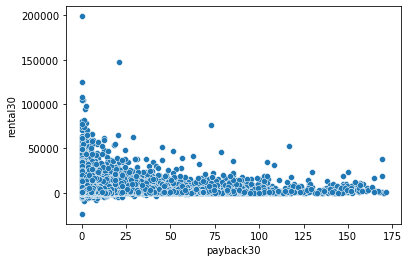

In [108]:
sns.scatterplot(x='payback30',y='rental30',data=data)

- It can be seen from plot that  if  average main account balance over 30 days is less then  average payback time in days for past 30 days increases.

<AxesSubplot:xlabel='rental90', ylabel='payback90'>

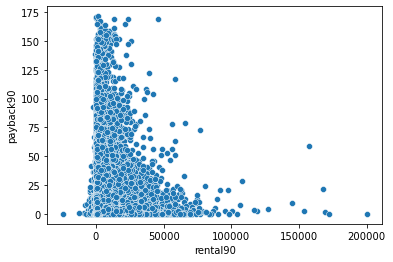

In [107]:
sns.scatterplot(x='rental90',y='payback90',data=data)

- It can be seen from the plot that  if average main account balance over 90 days is less then average payback time in days for past 90 days also increases.

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='payback30'>

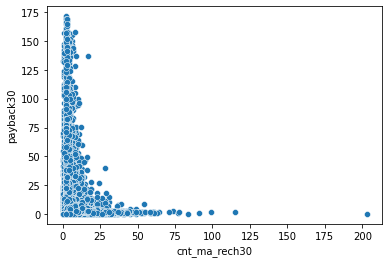

In [109]:
sns.scatterplot(x='cnt_ma_rech30',y='payback30',data=data)

- It can be seen from plot that if more number of times account got recharged in last 30 days then less then high number of payback time in days is seen.

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='payback90'>

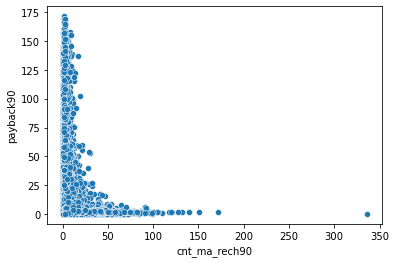

In [110]:
sns.scatterplot(x='cnt_ma_rech90',y='payback90',data=data)

- It can be seen from plot that if more number of times account got recharged in last 90 days then less then high number of payback time in days is seen.

<AxesSubplot:xlabel='cnt_loans30', ylabel='payback30'>

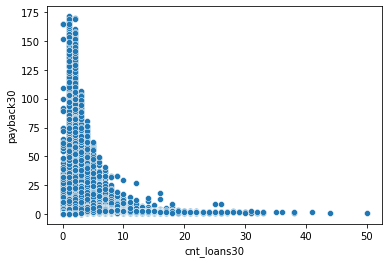

In [111]:
sns.scatterplot(x='cnt_loans30',y='payback30',data=data)

- It can be seen that of number of loans taken by user in last 30 days is more then its payback time in days is also faster.

<AxesSubplot:xlabel='cnt_loans90', ylabel='payback90'>

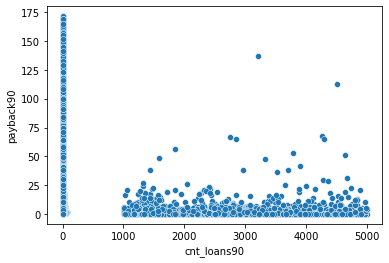

In [114]:
sns.scatterplot(x='cnt_loans90',y='payback90',data=data)

- There is no general trend seen in this plot.
- The number of loans that taken by user in past 90 days are mostly paid back in approx. 0-25 days.

In [119]:
#describing dataset
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,day,month
count,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000
mean,0.875177,8112.380399,5381.412999,6082.529123,2692.578912,3483.407309,3755.865715,2064.458973,3.978053,3737.372947,7704.496570,1812.819258,3851.945862,6.315437,7.716812,12396.236149,1864.597375,92.025522,2.758975,17.951992,6.624585,18.520988,23.645397,6.703138,3.398639,4.321302,14.398899,6.797321
std,0.330519,75696.261220,9220.644093,10918.836919,4308.596841,5770.475034,53906.020204,2370.790003,4.256099,53643.752523,10139.645685,2070.869474,54006.502647,7.193487,12.590273,16857.832129,2081.685508,369.216539,2.554507,17.379778,2.198065,224.797957,26.469924,2.103869,8.813330,10.307791,8.438899,0.741437
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,246.000000,42.439500,42.691917,280.417500,300.260000,1.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.600000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,527.000000,1469.091833,1500.000000,1083.540000,1334.000000,3.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.000000,2.000000,7226.000000,1539.000000,36.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,982.000000,7244.096000,7802.795000,3356.945000,4201.792500,7.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,79.310000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,21.000000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,12.000000,4997.517944,438.000000,12.000000,171.500000,171.500000,31.000000,8.000000


- Observations:
    - It can be seen that total of 8 columns has negative values. This values needs to be converted into positive using numpy.abs method.
    - Similarly we can see that there are presence of outliers. Also its seen that skewness is present in many columns.

In [37]:
# converting negative values to positive
data['aon']=np.abs(data['aon'])
data['daily_decr30']=np.abs(data['daily_decr30'])
data['daily_decr90']=np.abs(data['daily_decr90'])
data['rental30']=np.abs(data['rental30'])
data['rental90']=np.abs(data['rental90'])
data['last_rech_date_ma']=np.abs(data['last_rech_date_ma'])
data['medianmarechprebal30']=np.abs(data['medianmarechprebal30'])
data['medianmarechprebal90']=np.abs(data['medianmarechprebal90'])


In [38]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,day,month
count,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000
mean,0.875177,8112.845675,5381.442003,6082.558196,2715.373669,3509.498048,3756.143760,2064.458973,3.978053,3737.372947,7704.496570,1812.819258,3854.236951,6.315437,7.716812,12396.236149,1864.597375,94.436308,2.758975,17.951992,6.624585,18.520988,23.645397,6.703138,3.398639,4.321302,14.398899,6.797321
std,0.330519,75696.211355,9220.627165,10918.820723,4294.267480,5754.644314,53906.000830,2370.790003,4.256099,53643.752523,10139.645685,2070.869474,54006.339189,7.193487,12.590273,16857.832129,2081.685508,368.607286,2.554507,17.379778,2.198065,224.797957,26.469924,2.103869,8.813330,10.307791,8.438899,0.741437
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,246.000000,42.452250,42.693333,299.700000,330.000000,1.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.670000,2.000000,0.000000,2317.000000,773.000000,15.300000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,7.000000,6.000000
50%,1.000000,527.000000,1469.091833,1500.000000,1095.740000,1347.210000,3.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.000000,2.000000,7226.000000,1539.000000,37.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,14.000000,7.000000
75%,1.000000,982.000000,7244.096000,7802.795000,3362.352500,4204.572500,7.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,85.300000,8.000000,8.000000,16000.000000,1924.000000,81.500000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,21.000000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,12.000000,4997.517944,438.000000,12.000000,171.500000,171.500000,31.000000,8.000000


- It can be seen from above table that there are no negative values present anymore in dataset

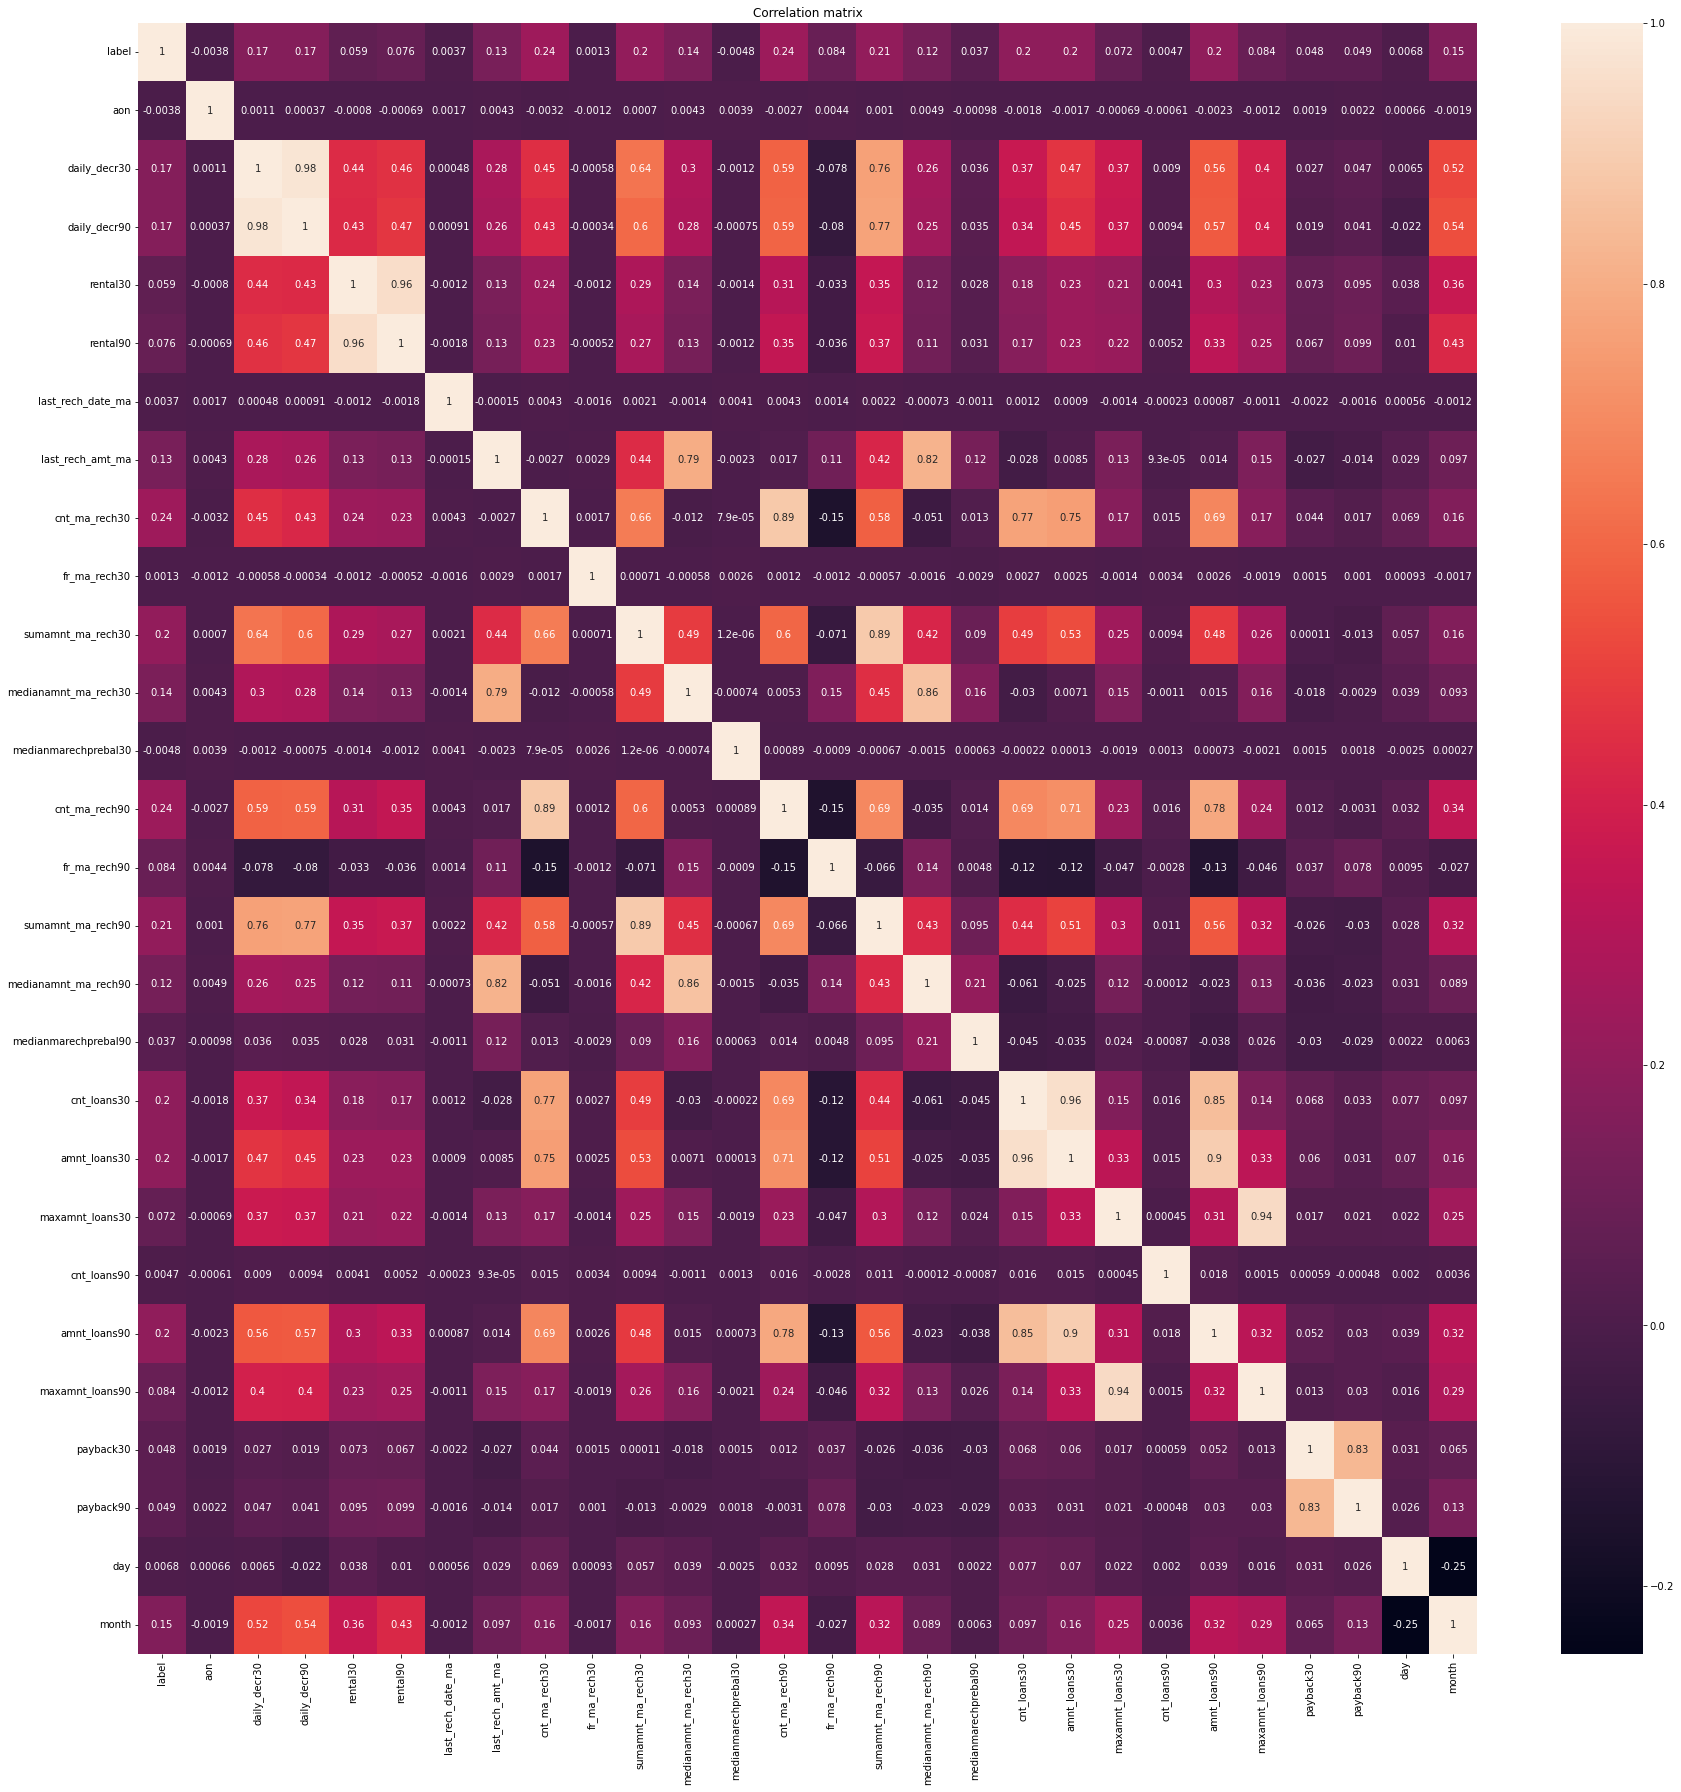

In [226]:
# plotting heatmap to check for correlation within features and with respect to label
#plotting heatmap

plt.figure(figsize=(30,30))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

- I consider 75% as the minimum margin to consider that two features show multicollinearity.
- In above heatmap it can be seen that many features shows multicollinearity
- Since there are many columns that show multicollinearity I will use VIF and PCA to drop columns that are not required for model building.

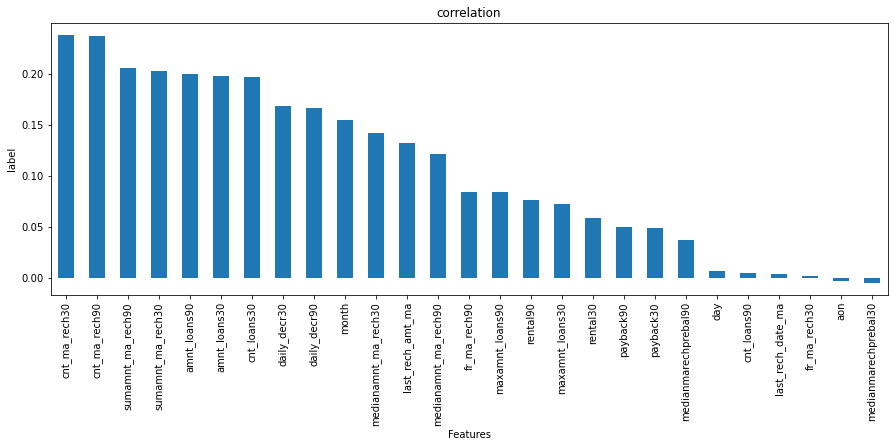

In [39]:
#plotting a coorelation plot that will show relation of features with label

plt.figure(figsize=(15,5))
data.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('label')
plt.title('correlation')
plt.show()

- In above plot the highest relation of approx. 25% is shows by cnt_ma_rech_30 column while lowest is shown by medianmarechprebal30 column.

# Checking for skewness in dataset

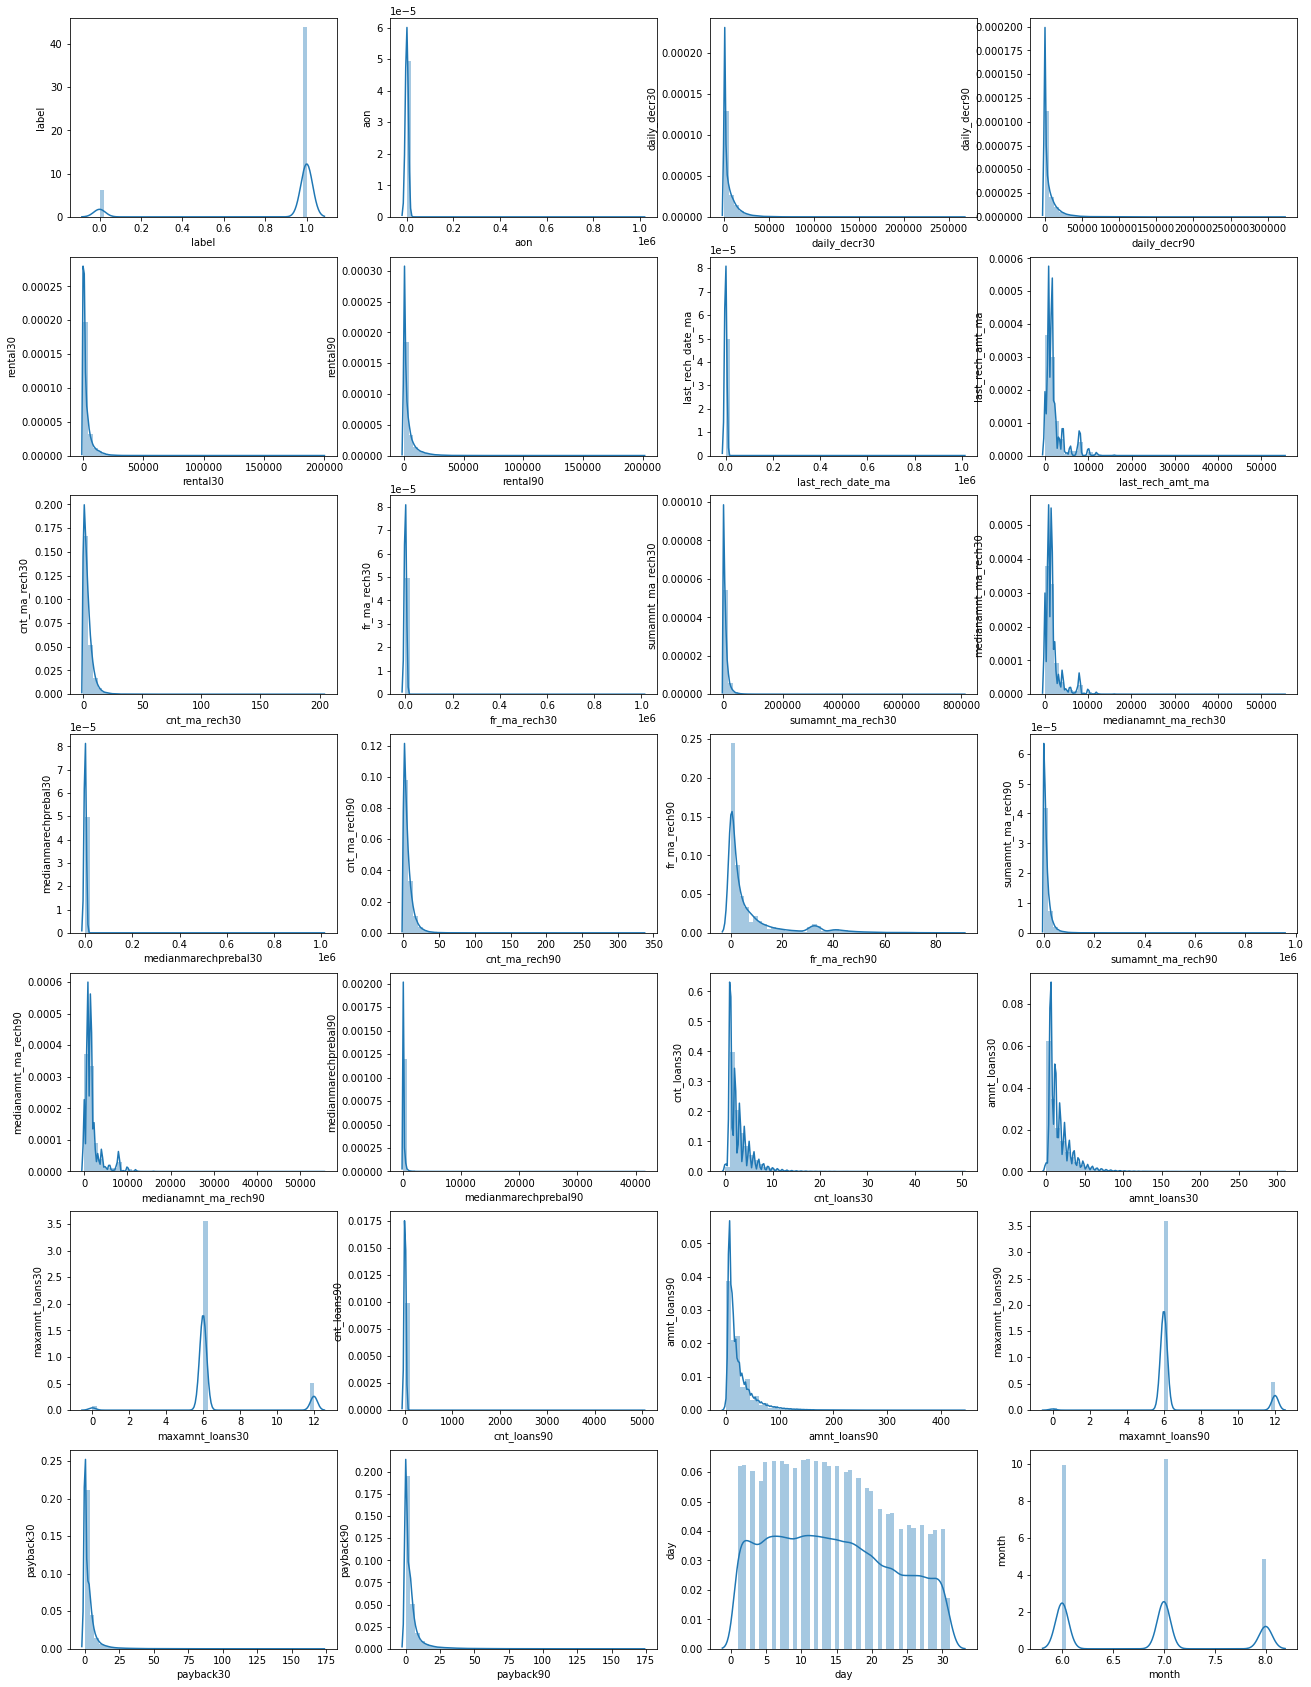

In [129]:
#plotting distplots

plt.figure(figsize=(22,30))
plotnumber=1
for column in data:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(data[column])
        plt.ylabel(column)
    plotnumber+=1
plt.show()

- all the columns are skewed as seen in distplots but checkig their skewness values to confirm it.

In [130]:
#checking for skewness values in dataset
data.skew()

label                   -2.270245
aon                     10.392926
daily_decr30             3.946235
daily_decr90             4.252567
rental30                 4.560502
rental90                 4.467271
last_rech_date_ma       14.790939
last_rech_amt_ma         3.781141
cnt_ma_rech30            3.283838
fr_ma_rech30            14.772797
sumamnt_ma_rech30        6.386774
medianamnt_ma_rech30     3.512314
medianmarechprebal30    14.779847
cnt_ma_rech90            3.425244
fr_ma_rech90             2.285415
sumamnt_ma_rech90        4.897937
medianamnt_ma_rech90     3.752696
medianmarechprebal90    45.086190
cnt_loans30              2.713426
amnt_loans30             2.975720
maxamnt_loans30          1.241873
cnt_loans90             16.594368
amnt_loans90             3.149999
maxamnt_loans90          1.678297
payback30                8.311500
payback90                6.900427
day                      0.199856
month                    0.343245
dtype: float64

- Except for  day and month all the columns have skewness present. Skewness for label cannot be considered as it is a target variable.

# using power transformer to remove skewness from dataset

In [40]:
#list that has all the data whose skewness need to be removed/lowered

features=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

In [41]:
#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method to transform

In [42]:
#transforming the data
data[features]=scaler.fit_transform(data[features])

In [43]:
data.skew()

label                  -2.270245
aon                    -0.298535
daily_decr30           -0.130634
daily_decr90           -0.120625
rental30               -0.040536
rental90               -0.041326
last_rech_date_ma       0.012081
last_rech_amt_ma       -0.061265
cnt_ma_rech30          -0.000144
fr_ma_rech30            0.165014
sumamnt_ma_rech30      -0.291322
medianamnt_ma_rech30   -0.189630
medianmarechprebal30   -0.027935
cnt_ma_rech90          -0.002465
fr_ma_rech90            0.142950
sumamnt_ma_rech90      -0.192160
medianamnt_ma_rech90   -0.044606
medianmarechprebal90    0.014084
cnt_loans30             0.036243
amnt_loans30            0.001947
maxamnt_loans30         0.422680
cnt_loans90             0.105583
amnt_loans90           -0.008989
maxamnt_loans90         0.364281
payback30               0.298562
payback90               0.210885
day                     0.199856
month                   0.343245
dtype: float64

- Now the skewness for all column is well within range of + & - 0.5

# Checking for outliers in dataset

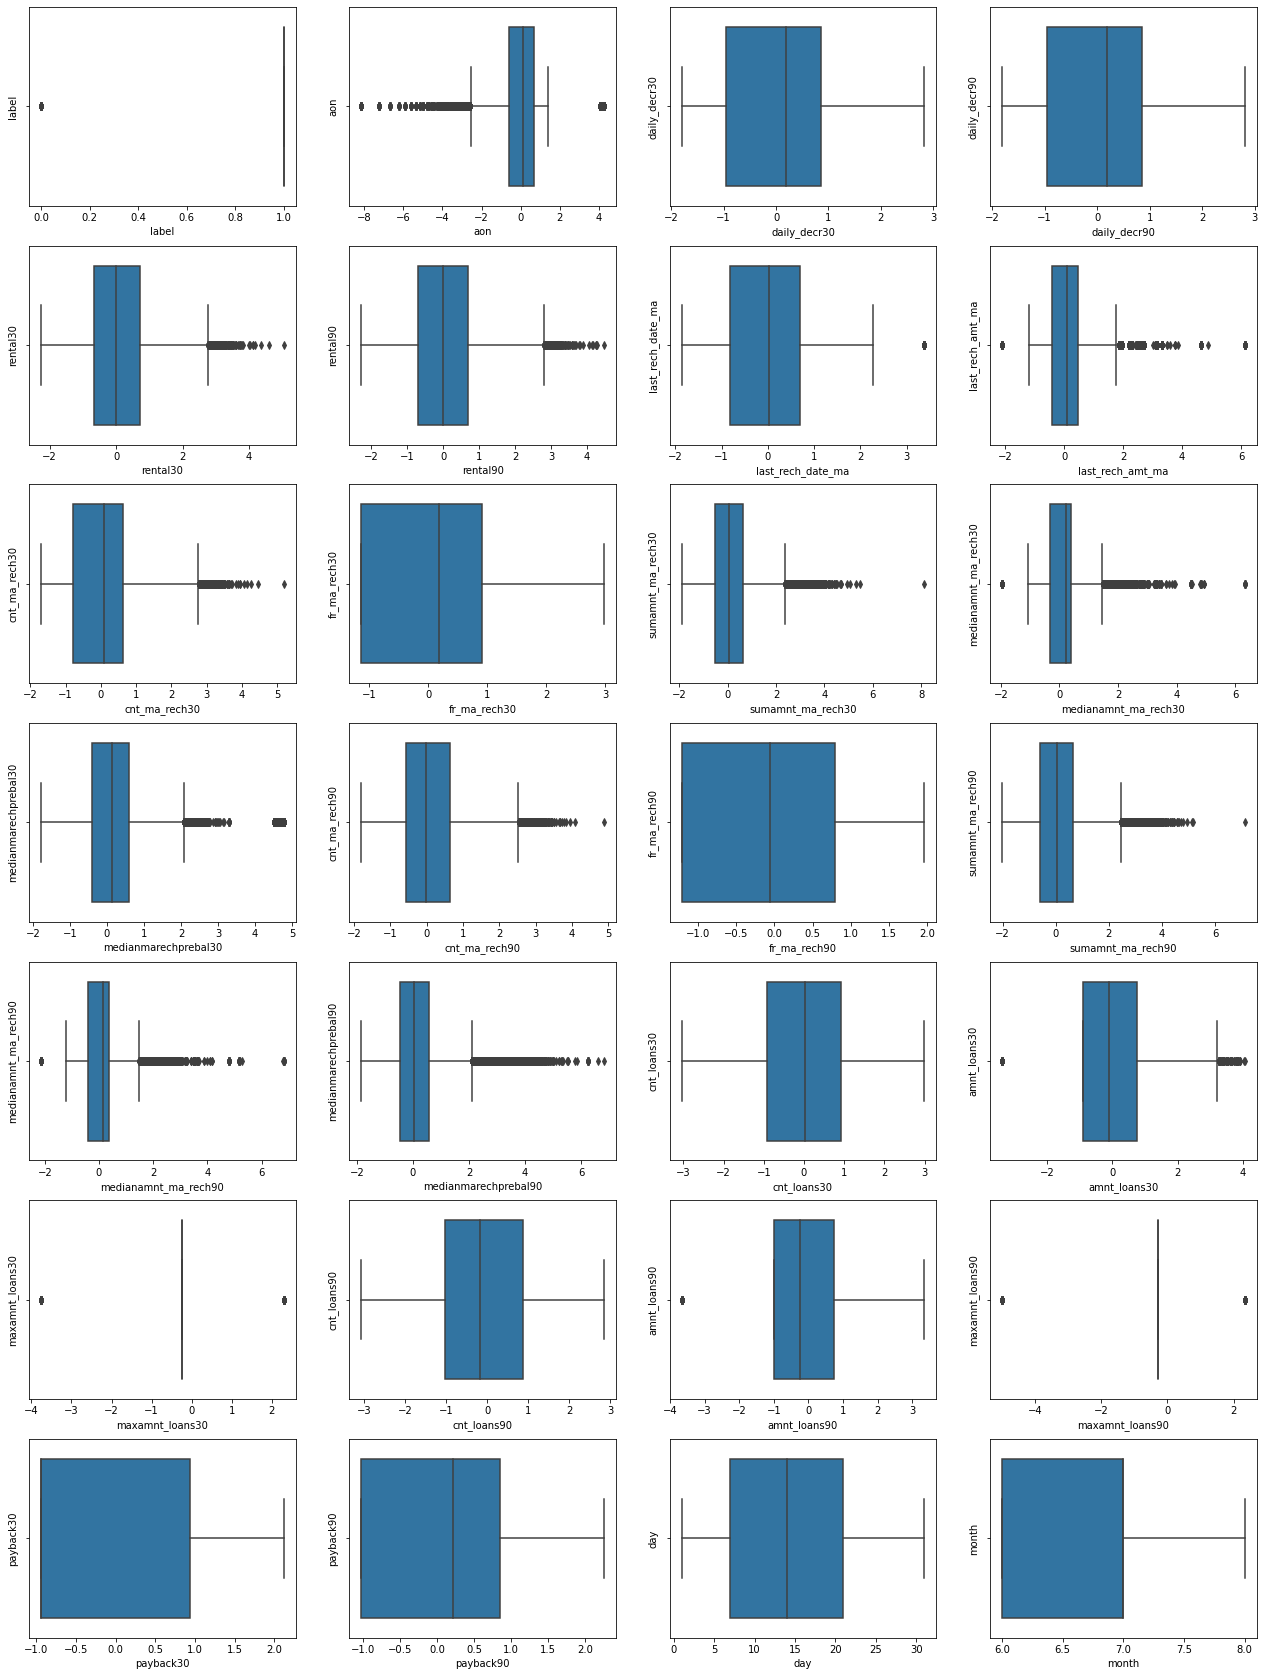

In [136]:
plt.figure(figsize=(22,30))
plotnumber=1
for column in data:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(data[column])
        plt.ylabel(column)
    plotnumber+=1
plt.show()

- It can be seen that most columns has outliers present in dataset.Hence removing them using z-score method.

In [44]:
#importing z score library

from scipy.stats import zscore

In [45]:
z_score=zscore(data[['aon','rental30', 'rental90','last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
                     'sumamnt_ma_rech30', 'medianamnt_ma_rech30','medianmarechprebal30', 'cnt_ma_rech90',
                     'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
                     'amnt_loans30', 'maxamnt_loans30','amnt_loans90', 'maxamnt_loans90']])

In [46]:
abs_z_score=np.abs(z_score)

In [47]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [48]:
#outliers removed dataset shape

data[filtering_entry].shape

(198475, 28)

In [49]:
#original dataset shape
data.shape

(209592, 28)

# Data loss after removing outliers

In [50]:
# data loss percentage 
data_loss=((209592-198475)/198475)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 5.601209220304824%


# Since the data loss is only 5%, hence saving outlier removed columns into original dataset

In [51]:
data=data[filtering_entry]

In [52]:
#new shape of dataset

data.shape

(198475, 28)

# splitting data into features and label

In [53]:
x=data.drop(['label'],axis=1)
y=data['label']

# Using VIF to find multicollinearity within columns.

In [54]:
#importing libraries for VIF and standard scaler

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

#saving into variable
scaler=StandardScaler()

In [55]:
# This is followed by standardizing data

x_scaled=scaler.fit_transform(x)

In [56]:
#VIF for train dataset

vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature_names']=x.columns
vif

,vif_values,feature_names
0,1.049609,aon
1,479.966888,daily_decr30
2,541.776022,daily_decr90
3,28.956485,rental30
4,32.610327,rental90
5,2.036002,last_rech_date_ma
6,6.856512,last_rech_amt_ma
7,59.132133,cnt_ma_rech30
8,2.020746,fr_ma_rech30
9,90.714524,sumamnt_ma_rech30


- There are 16 columns which shows multicollinearity.Dropping these columns is not the solution as some columns might be actually useful in model building.
# Hence using Principal Component Analysis (PCA) as it will take care of multicollinearity with selecting best features.

In [57]:
#importing libraries for PCA and standard scaler

from sklearn.decomposition import PCA

In [58]:
#saving in variable

pca=PCA()

In [59]:
#fit and transforming features to PCA

pca.fit_transform(x_scaled)

array([[ 2.30136207e-01, -5.13278311e-01, -9.51677355e-01, ...,
         3.64486161e-02,  2.04924835e-02,  1.08484934e-02],
       [ 1.01036197e+00,  3.01187645e+00,  4.66717098e+00, ...,
         1.08070452e-01, -2.87003907e-02, -1.80651448e-02],
       [-2.10114027e+00,  1.51570576e+00,  1.67566848e+00, ...,
        -1.41293506e-02,  5.17605919e-03, -2.72467258e-02],
       ...,
       [ 4.44122525e+00, -1.28155050e+00,  1.68508175e+00, ...,
         7.76639122e-02, -7.39286368e-02, -2.36501601e-02],
       [ 2.55199861e+00,  7.54947318e-02,  1.86956528e+00, ...,
        -1.17236940e-01, -1.35487239e-01, -7.47765534e-03],
       [ 2.38788531e+00,  3.68689167e+00,  2.12095549e+00, ...,
        -1.11119941e-01, -5.49239369e-02,  3.57664528e-03]])

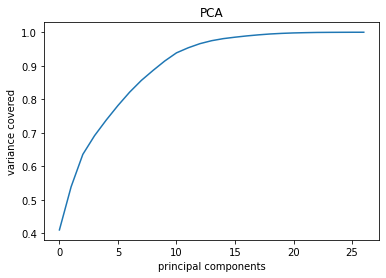

In [60]:
#plotting curve to see how many featutes are related

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

It can be seen from above curve that at 20 features the data covered is almost 100%, hence taking 20 features and dropping rest of them.

In [61]:
#selecting 11 features as the best ones in model building

pca=PCA(n_components=20)
new_comp=pca.fit_transform(x_scaled)

In [62]:
#creating a dataframe of new features

princi_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                          'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17',
                                          'PC18','PC19','PC20'])
princi_comp[:5]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.230136,-0.513278,-0.951677,-1.265504,-2.793844,-0.116905,-0.205908,1.086286,0.696117,-0.737281,1.460407,-0.541767,-0.046083,-0.010312,-0.506414,-0.041041,-0.010709,-0.113260,0.005519,0.059569
1,1.010362,3.011876,4.667171,1.752091,0.178174,-0.227716,1.500659,-0.065764,0.280145,0.853747,0.681345,0.209583,0.679512,-0.814081,-0.465052,0.380376,0.053489,-0.169527,0.048952,0.171173
2,-2.101140,1.515706,1.675668,-0.704292,1.299485,-0.165336,0.206959,-0.814901,0.567397,-0.546289,1.214056,0.315300,0.445383,-0.373664,-0.105122,0.989108,0.006952,-0.260364,0.045844,0.115476
3,-4.396807,-0.624606,0.092198,0.443957,0.411151,-0.623769,1.909980,1.523120,1.163354,0.521128,-2.084986,-0.126125,0.620387,0.418523,-0.072827,-0.337949,-0.087736,0.102942,-0.583505,-0.069377
4,2.486374,-0.457364,-2.559560,0.958864,0.406469,0.746009,1.385460,0.056111,-0.586828,-0.224137,-0.478808,0.146199,0.147788,-0.032900,-0.002382,0.156955,0.285771,-0.207221,-0.062399,-0.001742


# Handling oversampling problem for target column.

In [63]:
data['label'].value_counts()

1    173466
0     25009
Name: label, dtype: int64

- Since the data is oversampled,
# Hence using SMOTE method to balance 'label' column

In [64]:
#importing library for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sm=SMOTE()

In [65]:
x_new,y_new=sm.fit_resample(princi_comp,y)
print('The no. of classes before fit',format(Counter(y)))
print('The no. of classes after fit',format(Counter(y_new)))

The no. of classes before fit Counter({1: 173466, 0: 25009})
The no. of classes after fit Counter({0: 173466, 1: 173466})


# Model Building part

In [66]:
#imprting algorithm libraries
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#import metrics library
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import train_test_split

#importing cross validation library
from sklearn.model_selection import cross_val_score

In [67]:
#saving models in variables

rf=RandomForestClassifier()
ab=AdaBoostClassifier()
xgb=xgb.XGBClassifier()
lr=LogisticRegression()

- **The scaled features are saved in princi_comp and label in y_new.**

In [75]:
#finding best random state for model
for i in range(0,15):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    xgb.fit(x_train,y_train)
    y_pred=xgb.predict(x_train)
    pred=xgb.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    '\n'

training accuracy is  89.15522350201192  for random state  0
testing accuracy is  87.55490989588738  for random state  0
training accuracy is  89.05184109085738  for random state  1
testing accuracy is  87.50417949338775  for random state  1
training accuracy is  89.21018143805318  for random state  2
testing accuracy is  87.60218140730748  for random state  2
training accuracy is  89.19134969773135  for random state  3
testing accuracy is  87.43846056287687  for random state  3
training accuracy is  88.96921202617996  for random state  4
testing accuracy is  87.372741632366  for random state  4
training accuracy is  89.18289463064808  for random state  5
testing accuracy is  87.40963647054755  for random state  5
training accuracy is  89.17059635125423  for random state  6
testing accuracy is  87.82124450901041  for random state  6
training accuracy is  89.2055695832805  for random state  7
testing accuracy is  87.59987547992114  for random state  7
training accuracy is  89.1098735967

-Taking random state as 13.

In [76]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))
        print('F1 Score',f1_score(y_test,pred))

In [77]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
#passing the function
metric_score(xgb,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(xgb,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:89.10%
-----Testing score-----
Accuracy score:87.51%
classification report 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     43179
           1       0.88      0.86      0.87     43554

    accuracy                           0.88     86733
   macro avg       0.88      0.88      0.88     86733
weighted avg       0.88      0.88      0.88     86733

confusion matrix  [[38281  4898]
 [ 5936 37618]]
F1 Score 0.8741257116300686


In [267]:
#finding best value for cv in provided range
for i in range(2,6):
    cv_score=cross_val_score(xgb,x_new,y_new,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  87.17616132267996
At cv:- 3
cross validation score:-  87.45143140442508
At cv:- 4
cross validation score:-  87.55116276388458
At cv:- 5
cross validation score:-  87.5125406845527


In [79]:
#cross validation score
print('Cross Validation Score for XGB model :- ',((cross_val_score(xgb,x_new,y_new,cv=4).mean())*100))

Cross Validation Score for XGB model :-  87.6145757670091


# Plotting ROC curve

In [270]:
#importing ROC curve library

from sklearn.metrics import roc_curve,auc

In [271]:
pred=xgb.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.11364321 1.        ]
tpr [0.         0.86373238 1.        ]
threshold [2 1 0]


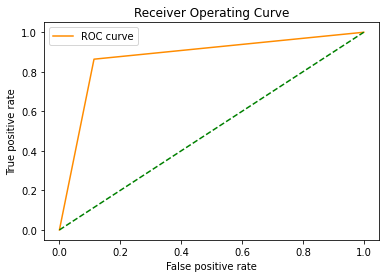

In [272]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Random Forests Classifier

In [273]:
#training model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [274]:
# passing the function
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:93.73%
classification report 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     43179
           1       0.95      0.92      0.94     43554

    accuracy                           0.94     86733
   macro avg       0.94      0.94      0.94     86733
weighted avg       0.94      0.94      0.94     86733

confusion matrix  [[41094  2085]
 [ 3350 40204]]
F1 Score 0.9366867420756497


In [276]:
#cross validation score
print('Cross Validation Score for Random Forest model :- ',((cross_val_score(rf,x_new,y_new,cv=4).mean())*100))

Cross Validation Score for Random Forest model :-  93.9103340135819


# plotting ROC curve

In [277]:
pred=rf.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.04828736 1.        ]
tpr [0.         0.92308399 1.        ]
threshold [2 1 0]


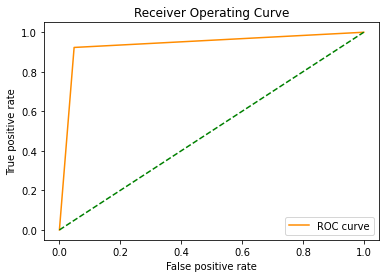

In [278]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# AdaBoost Classifier

In [279]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [280]:
# passing the function
metric_score(ab,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(ab,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:79.11%
-----Testing score-----
Accuracy score:78.79%
classification report 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79     43179
           1       0.79      0.78      0.79     43554

    accuracy                           0.79     86733
   macro avg       0.79      0.79      0.79     86733
weighted avg       0.79      0.79      0.79     86733

confusion matrix  [[34285  8894]
 [ 9500 34054]]
F1 Score 0.7873575177452545


In [281]:
#cross validation score
print('Cross Validation Score for AdaBoost model :- ',((cross_val_score(ab,x_new,y_new,cv=4).mean())*100))

Cross Validation Score for AdaBoost model :-  79.08408564214312


# Plotting ROC Curve

In [282]:
pred=ab.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.20597976 1.        ]
tpr [0.         0.78187997 1.        ]
threshold [2 1 0]


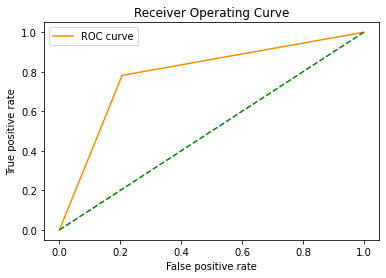

In [283]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Logistic Regression

In [284]:
lr.fit(x_train,y_train)

LogisticRegression()

In [291]:
# passing the function
metric_score(lr,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(lr,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:77.04%
-----Testing score-----
Accuracy score:76.93%
classification report 
               precision    recall  f1-score   support

           0       0.76      0.78      0.77     43179
           1       0.78      0.75      0.77     43554

    accuracy                           0.77     86733
   macro avg       0.77      0.77      0.77     86733
weighted avg       0.77      0.77      0.77     86733

confusion matrix  [[33857  9322]
 [10689 32865]]
F1 Score 0.7666110728822849


In [286]:
#cross validation score
print('Cross Validation Score for Logistic Regression model :- ',((cross_val_score(r,x_new,y_new,cv=4).mean())*100))

Cross Validation Score for Logistic Regression model :-  77.02604544982879


# Plotting ROC Curve

In [287]:
pred=lr.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.21589198 1.        ]
tpr [0.         0.75458052 1.        ]
threshold [2 1 0]


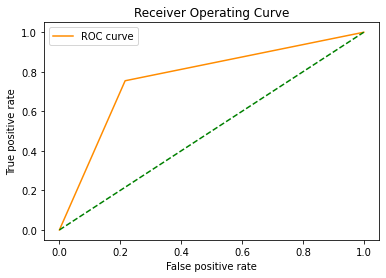

In [288]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

In [289]:
#importing library for decision tree and gradient boosting model algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

dt=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()

# Decision Tree Classifier

In [290]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [292]:
# passing the function
metric_score(dt,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(dt,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:87.47%
classification report 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     43179
           1       0.89      0.85      0.87     43554

    accuracy                           0.87     86733
   macro avg       0.88      0.87      0.87     86733
weighted avg       0.88      0.87      0.87     86733

confusion matrix  [[38647  4532]
 [ 6339 37215]]
F1 Score 0.8725571798689349


In [293]:
#cross validation score
print('Cross Validation Score for Decision Tree model :- ',((cross_val_score(dt,x_new,y_new,cv=4).mean())*100))

Cross Validation Score for Decision Tree model :-  87.83046821855581


# Plotting ROC Curve

In [294]:
pred=dt.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.10495843 1.        ]
tpr [0.         0.85445654 1.        ]
threshold [2 1 0]


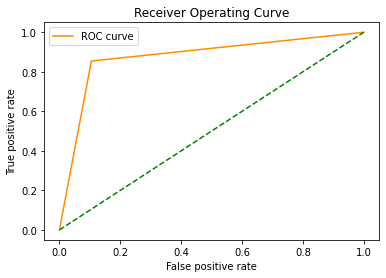

In [295]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Gradient Boosting Classifier

In [296]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [297]:
# passing the function
metric_score(gbdt,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(gbdt,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:82.74%
-----Testing score-----
Accuracy score:82.40%
classification report 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82     43179
           1       0.82      0.83      0.83     43554

    accuracy                           0.82     86733
   macro avg       0.82      0.82      0.82     86733
weighted avg       0.82      0.82      0.82     86733

confusion matrix  [[35115  8064]
 [ 7197 36357]]
F1 Score 0.826530264279625


In [299]:
#cross validation score
print('Cross Validation Score for Gradient Boosting model :- ',((cross_val_score(gbdt,x_new,y_new,cv=4).mean())*100))

Cross Validation Score for Gradient Boosting model :-  82.49311104193329


# Plotting ROC Curve

In [300]:
pred=gbdt.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.18675745 1.        ]
tpr [0.         0.83475685 1.        ]
threshold [2 1 0]


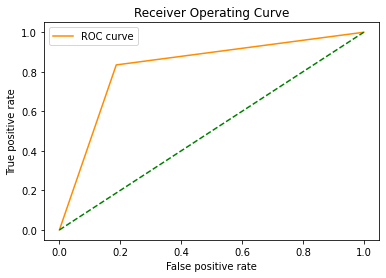

In [301]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Plotting ROC and compare AUC for all the models used

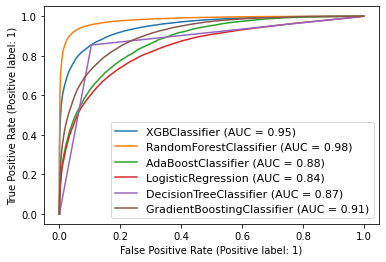

In [302]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(xgb,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ab, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbdt, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# DataFrame showing the training and testing score, cross validation scores, F1 score and AUC score for all models.

In [304]:
model_data=pd.DataFrame({'Model':['XGB','Random Forests','AdaBoost','Logistic regression','Decision Trees','Gradient Boosted Tees',],
                    'Training scores':[89.07,100,79.11,77.04,100,82.74],
                    'Testing scores':[87.50,93.73,78.79,76.93,87.47,82.40],
                    'Cross validation score':[87.55,93.91,79.08,77.02,87.83,82.49],
                    'F1 score':[87.40,93.66,78.73,76.66,87.25,82.65],
                        'AUC score':[95,98,88,84,87,91]})
model_data

,Model,Training scores,Testing scores,Cross validation score,F1 score,AUC score
0,XGB,89.07,87.50,87.55,87.40,95
1,Random Forests,100.00,93.73,93.91,93.66,98
2,AdaBoost,79.11,78.79,79.08,78.73,88
3,Logistic regression,77.04,76.93,77.02,76.66,84
4,Decision Trees,100.00,87.47,87.83,87.25,87
5,Gradient Boosted Tees,82.74,82.40,82.49,82.65,91


- looking at the above dataframe it can be seen that Random Forest is the best model with better testing accuracy than others.
# Hence performing hyperparameter tuning on Random Forest model

In [80]:
#importing library for for grid search CV

from sklearn.model_selection import GridSearchCV

In [84]:
grid_param=[{'max_depth':[1,2,3],
           'criterion':['gini','entropy','log_loss'],
            'min_samples_split':(2,3),
            'max_features':["sqrt", "log2", None]}]

In [85]:
#saving model in variable
grid=GridSearchCV(RandomForestClassifier(),param_grid=grid_param)

In [86]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_split': (2, 3)}])

In [87]:
#best parameters for tuning
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_split': 2}

In [88]:
#using best parameters to train 
rf1=RandomForestClassifier(max_depth=3,
                           criterion='gini',
                           min_samples_split=2,
                           max_features='log2')

In [89]:
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features='log2')

In [90]:
#passing the function
metric_score(rf1,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(rf1,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:76.42%
-----Testing score-----
Accuracy score:76.36%
classification report 
               precision    recall  f1-score   support

           0       0.78      0.73      0.75     43179
           1       0.75      0.80      0.77     43554

    accuracy                           0.76     86733
   macro avg       0.76      0.76      0.76     86733
weighted avg       0.76      0.76      0.76     86733

confusion matrix  [[31491 11688]
 [ 8816 34738]]
F1 Score 0.772127139364303


In [91]:
#cross validation score
print('Cross Validation Score for tuned Random Forest Classifier model :- ',((cross_val_score(rf1,x_new,y_new,cv=4).mean())*100))

Cross Validation Score for tuned Random Forest Classifier model :-  76.02584944600095


Original random forest model had seen more data with better test score.

# Hence saving original Random Forest model

# Saving the model using pickle

In [92]:
import pickle

In [93]:
pickle.dump(rf,open('micro_loans_rf','wb'))